# Первое задание

## Image -> numpy array

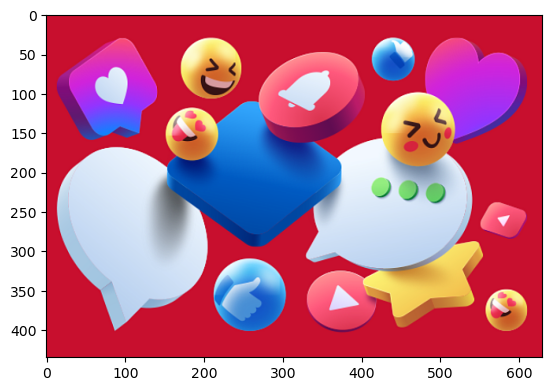

In [98]:
from PIL import Image
from matplotlib.pyplot import figure, imshow, show
import numpy as np

def get_png_array() -> np.array:
    image = Image.open("example.png")
    image_array = np.array(image)[:, :, :3]
    return image_array


def show_image(array: np.array):
    figure()
    imshow(array, cmap='Greys')
    show()


show_image(get_png_array())

## Инвертирование изображения 

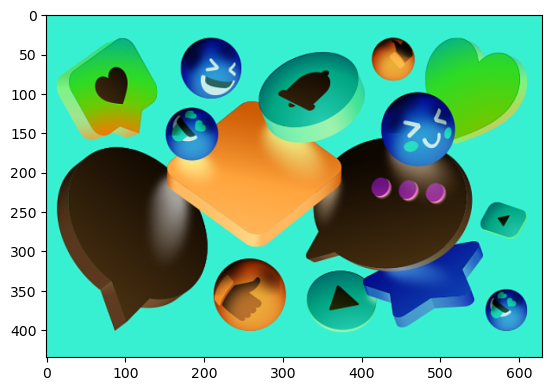

In [99]:
from PIL import Image
import numpy as np


image_array = get_png_array()
negative_image_array = 255 - image_array

show_image(negative_image_array)

## Полутон

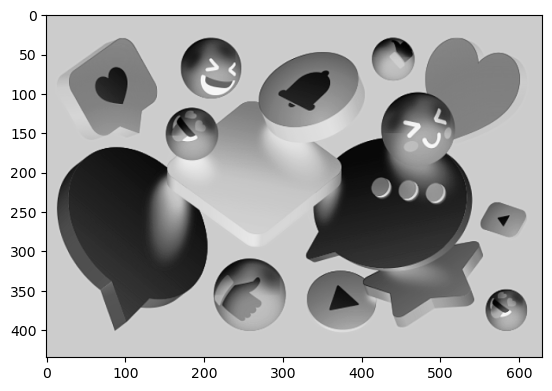

In [100]:
from PIL import Image
import numpy as np

def get_halftone_array() -> np.array:
    image_array = get_png_array()
    mean = np.mean(image_array, axis=2, dtype=int)
    return mean

show_image(get_halftone_array())
# get_halftone_array()

## Добавление шума

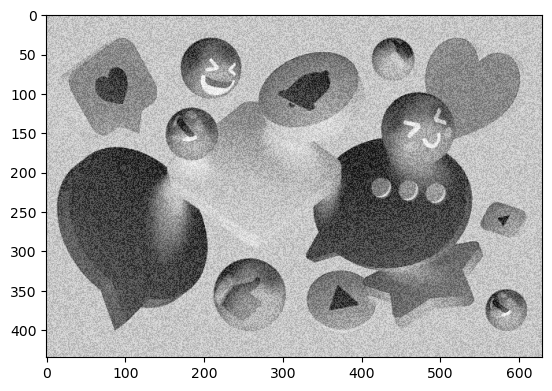

In [101]:
import random
from PIL import Image
import numpy as np


def get_noise_png(mean: float = 50, sigma: float = 5, data_type=float) -> np.array:
    halftone_image_array = get_halftone_array()
    return np.array([np.array([pixel + random.gauss(mean, sigma) * random.randint(0, 1) for pixel in row], dtype=data_type)
                     for row in halftone_image_array])

show_image(get_noise_png())
# max(np.array([np.max(row) for row in noise_appended]))

## Построение гистограммы

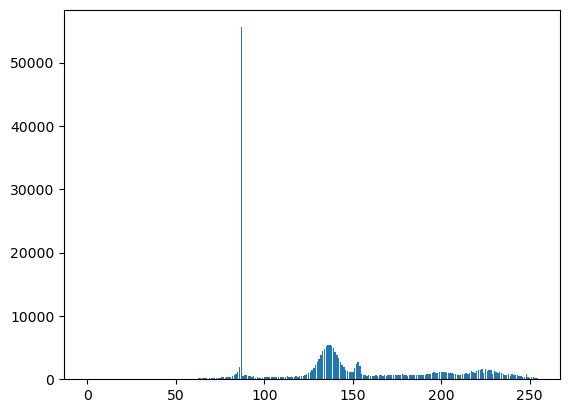

In [102]:
import random
from collections import Counter

from matplotlib.pyplot import bar
import numpy as np
import numpy.typing as npt
from PIL import Image


noise_appended_array = get_noise_png(data_type=int)

def draw_bar(data: npt.NDArray[int]):
    cnt = Counter(data.reshape(-1))
    x = list(range(255))
    y = [cnt.get(el, 0) for el in x]
    bar(x, y)

draw_bar(noise_appended_array)
# cnt.most_common(3)

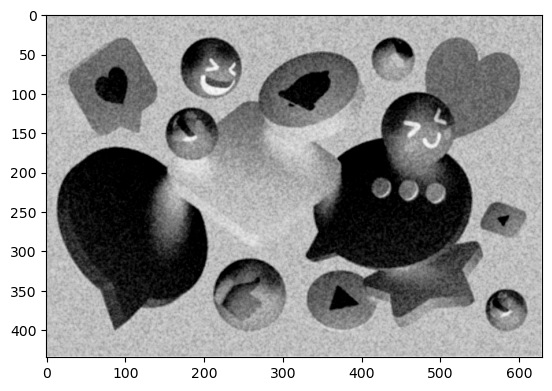

In [103]:
import numpy as np
from PIL import Image


image_array = get_noise_png(data_type=float)

def image_filter(K_size, sigma, im):
    H, W = im.shape
    
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2), np.float64)
    out[pad: pad + H, pad: pad + W] = im.copy().astype(np.float64)

    K = np.zeros((K_size, K_size), np.float64)
    for x in range(-pad, -pad + K_size):
        for y in range(-pad, -pad + K_size):
            K[y + pad, x + pad] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * sigma * sigma)
    K /= K.sum()
 
    tmp = out.copy()
  
    for y in range(H):
        for x in range(W):
            out[pad + y, pad + x] = np.sum(K * tmp[y: y + K_size, x: x + K_size])
    out = np.clip(out, 0, 255)
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)
    return out

show_image(image_filter(3, 10, image_array))
